# COGS 108 - Final Project 

# Overview

Since the first video game was created half a century ago, the gaming industry has gone through lots of evolutions to become what it’s like today. As technology advances, more video games with better graphics and more innovative gameplays are published every year and gained huge popularity. A good portion of the games published each year are soon considered outdated and proceed to lose their popularity and player base over time, but there is always that one game that you as a player come back to once in a while and just never seem to get tired of. Games nowadays are often categorized fairly broadly, with many falling into the categories of shooters, rpgs, rogue-likes, and so on. Our main goal with this project is to see what type of categories tend to get the best user responses to them and how this response has shifted over time. We wanted to figure out what is the current trend for popular game categories. We will split this up by seeing the trends for each specific year and how the reception for the game has been.

We will utilize two datasets, one for Steam games and one for mobile games in order to see if there's a category more suited for mobile devices compared to computers. With these analysis, we can hopefully find a pattern that tells us what types of games are going to be the most popular for each platform.

# Names

- Edward Xie
- Simon Fei
- Abdiaziz Weheliye
- Anwen He

# Group Members IDs

- Edwardxie72 --- A15534895
- Simonfei123 --- A15658075
- aweheliy    --- A15690733
- ErwinHe2012 --- A92147485

# Research Question

Is there a significant difference in trends between mobile and PC Games?

Our second question for this was if there is a significant relation between the listed categories of a game and its user ratings? If that’s the case, what type of game categories get the best user ratings and how has this trend changed over the years?

## Background and Prior Work

The video game industry has been gaining huge amounts of popularity throughout the years and the gaming culture has almost become mainstream. Previously, big studios and developers tend to create and publish games on higher end PCs and gaming consoles like Microsoft’s Xbox and Sony’s Playstation. Judging by a report as recent as 2019, a larger portion of video games are distributed on portable devices that are more prevalent - smartphones, and they are generating up to 34% of the total revenue on the market, and more users prefer gaming on mobile platforms over PC gaming. 

Mobile games seem to have the most variation out of games on different platforms; some developers intend to bring out games with equivalent quality of those on bigger consoles that are capable of better performance in general, while others thrive on making small and delicate games with innovative gameplay that attracts casual players. PC gaming still takes up a huge portion of the pie. Steam, the biggest video game distribution platform on PC, released over 9000 new games on the store for the entirety of 2018, which equals to 25 games on average per day. However, these are a fraction of the number of gaming apps on the Google play store, which has over 240,000 games available for download at the moment. 

Both platforms use a strict review system, percentage-based or using a 5-star rating that changes over the time. Steam, for example, shows two separate scores for each game, one represents the general review of all time since this game has been published, and the other represents the review it gets within the last 30 days. This system reflects well on users’ reaction towards games that are constantly being updated and patched even after their initial release. Combined with media sources giving more authentic reviews from time to time, it is known for a fact that the developers take player reviews very seriously and they rely heavily on those reviews to give them ideas of what to work on next. With the industry taking notice of the importance of player reviews, more studies on how the background culture of players affect their selection of genres and categories were conducted. We as a group are inspired by these ideas and want to take a more methodical approach to find a pattern between reviews and categories of games, with an emphasis on the difference between the trends shown on different platforms.

References:

1. 2019 Video Game Industry Statistics, Trends & Data https://www.wepc.com/news/video-game-statistics/
2. Number of games released on Steam worldwide 2004 to 2018 https://www.statista.com/statistics/552623/number-games-released-steam/
3. The Structure of Video Game Preference http://gamestudies.org/1702/articles/klevjer_hovden
4. Top 10 Most Popular Video Game Genres Dominating the Global Gaming Market 2018 https://blog.technavio.com/blog/top-10-most-popular-game-genres

# Hypothesis


Our project primarily focuses on finding the relationship between game categories and user ratings over the years and whether there is a difference regarding how games with certain tags gain a higher rating on PC compared to games on mobile platforms. 

We suspect that platform specific features would give certain genres some edge over the others. For example, because PC has better graphical power, graphical intensive games such as action genre might give gamers better experience; on the other hand, mobile games have their advantage of the convenience and availability, so genres such as casual could win out the rest. But mobile games have caught up in graphics over time, so we might see rising ratings for genres that tend to have more graphically intensive games. 

Because we are using publicly available data, we can’t have any insight into whether there is any personality differences between PC gamers and mobile gamers. We’d still hypothesize that PC gamers like the ones that are more competitive, such as action and strategies, which encompass most e-sports titles. Mobile gamers would be interested in strategies as well because a lot of casual games tend to be light puzzle-solvers.

# Dataset(s)

*Dataset Information*

- Dataset Name: Steam Store Games
- Link to the dataset: https://www.kaggle.com/nikdavis/steam-store-games
- Number of observations: 27033

This dataset contains 27033 games from steam and it includes information on the games. The data we will be utilizing for each game is the categories of the game, the genre of the game, the steamspy tags of the game, the number of positive ratings for the game, and the number of negative ratings for the game.

- Dataset Name: Google Store Play Apps
- Link to the dataset: https://www.kaggle.com/gauthamp10/google-playstore-apps#Google-Playstore-Full.csv
- Number of observations: 244407

This dataset contains 244407 apps from the play store. With this data set we will extract all the games and from these games, the data we will utilize from them is the category of the game, the rating for the app, and the review count for the app.

*How we will combine the datasets:*
We will be treating these as seperate databases, but will use the results to compare the differences between games on the computer and games on a mobile device to see if there is some difference in the trends between these.


# Setup

In [1]:
#Imports (Following A2 as a guideline for processing data)
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# for stats analysis
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import seaborn as sns

In [2]:
# Configure libraries(taken from A2)
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

## TODO
Describe your data cleaning steps here.

In [3]:
# Read in data
df_steam = pd.read_csv('steam.csv', low_memory=False)
df_googleplay = pd.read_csv('Google-Playstore-Full.csv', low_memory=False)

In [4]:
# Preview and clean up steam data set first
df_steam.head(5)

,appid,name,release_date,english,...,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,...,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,...,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,...,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,...,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,...,624,415,5000000-10000000,3.99


In [5]:
# Start by dropping unwanted data, keep the name so we have some way to identify apps, but not neccesary
del df_steam['appid']
del df_steam['english']
del df_steam['developer']
del df_steam['publisher']
del df_steam['platforms']
del df_steam['required_age']
del df_steam['achievements']
del df_steam['average_playtime']
del df_steam['median_playtime']
del df_steam['price']
del df_steam['owners']  # We drop owners because it gives a range which might make data inconsistent, instead we will weigh off each rating

In [6]:
# Rename categories before we start cleaning data
df_steam.columns = ['Name', 'Year', 'Steam Categories', 'Genre', 'Steamspy Categories', 'Positive Ratings', 'Negative Ratings']

In [7]:
# Extract only the year from the release date because we analyze by year
def extract_year(string):
    return int(string[:4])  # Only need first 4 characters for year

In [8]:
df_steam['Year'] = df_steam['Year'].apply(extract_year)  # Change all years in our df

In [9]:
# Preview and clean up Google Play Data
df_googleplay.head(5)

,App Name,Category,Rating,Reviews,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,...,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922,...,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967,...,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,...,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,...,NaN,NaN,NaN,NaN


In [10]:
# Start by dropping unwanted data, keep the name so we have some way to identify apps, but not neccesary
del df_googleplay['Installs']  # We don't care about installs for same reason as steam, use number of ratings instead
del df_googleplay['Size']
del df_googleplay['Price']
del df_googleplay['Content Rating']
del df_googleplay['Last Updated']
del df_googleplay['Minimum Version']
del df_googleplay['Latest Version']
del df_googleplay['Unnamed: 11']
del df_googleplay['Unnamed: 12']
del df_googleplay['Unnamed: 13']
del df_googleplay['Unnamed: 14']

In [11]:
df_googleplay = df_googleplay.dropna(subset=['Category', 'Rating', 'Reviews'])

In [12]:
# First start by dropping all non game category games, games will start with the string "GAME_" in category
df_googleplay = df_googleplay[df_googleplay['Category'].str.contains('GAME')]
df_googleplay = df_googleplay.reset_index(drop=True)

In [13]:
# Add extra columns to steam one for the average rating(out of 10) and total number of ratings(Pos rating/(Pos + neg rating))
df_steam['AvgRating'] = df_steam['Positive Ratings'].div(df_steam['Positive Ratings'].add(df_steam['Negative Ratings']))
df_steam['NumRating'] = df_steam['Positive Ratings'].add(df_steam['Negative Ratings'])

In [14]:
# Add extra columns to googleplay, one for avg rating(out of 10) and rename total to match steam
df_googleplay['Rating'] = df_googleplay['Rating'].astype(float)
df_googleplay['AvgRating'] = df_googleplay['Rating'].mul(2)
df_googleplay.rename(columns = {'Reviews':'NumRating'}, inplace = True) 

In [15]:
# Clean up the categories for the games
df_googleplay['Category'] = df_googleplay['Category'].str.slice(start=5)

In [16]:
# Preview mostly cleaned up data
df_steam.head(5)

,Name,Year,Steam Categories,Genre,...,Positive Ratings,Negative Ratings,AvgRating,NumRating
0,Counter-Strike,2000,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,124534,3339,0.97,127873
1,Team Fortress Classic,1999,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3318,633,0.84,3951
2,Day of Defeat,2003,Multi-player;Valve Anti-Cheat enabled,Action,...,3416,398,0.90,3814
3,Deathmatch Classic,2001,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,1273,267,0.83,1540
4,Half-Life: Opposing Force,1999,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,5250,288,0.95,5538


In [17]:
df_googleplay.head(5)

,App Name,Category,Rating,NumRating,AvgRating
0,King of Crabs,ACTION,3.28,785,6.56
1,Match 3 App Rewards: Daily Game Rewards,CASUAL,4.52,248,9.04
2,Brown Dust,ROLE_PLAYING,4.48,70260,8.95
3,Poly - Coloring Puzzle Art Book,PUZZLE,4.58,878,9.16
4,Legend of Empress,ROLE_PLAYING,3.82,750,7.64


In [18]:
del df_googleplay['AvgRating'] # Avg Rating is redundant since it's just (Rating * 2)
df_googleplay['NumRating'] = df_googleplay['NumRating'].astype(int)

In [19]:
df_googleplay['NumRating'] = df_googleplay['NumRating'].astype(int)

In [20]:
df_googleplay.head(5)

,App Name,Category,Rating,NumRating
0,King of Crabs,ACTION,3.28,785
1,Match 3 App Rewards: Daily Game Rewards,CASUAL,4.52,248
2,Brown Dust,ROLE_PLAYING,4.48,70260
3,Poly - Coloring Puzzle Art Book,PUZZLE,4.58,878
4,Legend of Empress,ROLE_PLAYING,3.82,750


In [21]:
# Clean up categories
# Convert Steam Categories + Genre + Steamspy Categories into one category and put it in an array
print(df_steam["Steam Categories"].unique(), len(df_steam["Steam Categories"].unique()))

['Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled'
 'Multi-player;Valve Anti-Cheat enabled'
 'Single-player;Multi-player;Valve Anti-Cheat enabled' ...
 'Online Multi-Player;Steam Achievements;Full controller support;In-App Purchases;Steam Cloud'
 'Multi-player;Local Multi-Player;Co-op;Local Co-op;Shared/Split Screen'
 'Multi-player;Online Multi-Player;Cross-Platform Multiplayer;Stats'] 3333


In [22]:
print(df_steam["Genre"].unique(), len(df_steam["Genre"].unique()))

['Action' 'Action;Free to Play' 'Action;Free to Play;Strategy' ...
 'Action;Adventure;Indie;Massively Multiplayer;RPG;Strategy;Early Access'
 'Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy'
 'Casual;Free to Play;Massively Multiplayer;RPG;Early Access'] 1552


In [23]:
print(df_steam["Steamspy Categories"].unique(), len(df_steam["Steamspy Categories"].unique()))

['Action;FPS;Multiplayer' 'FPS;World War II;Multiplayer'
 'FPS;Action;Sci-fi' ... 'Casual;Adventure;Arcade'
 'Free to Play;Visual Novel' 'Early Access;Adventure;Sexual Content'] 6423


In [24]:
# Convert Google Play Categories into same style as Steam
df_googleplay["Category"].unique()

array(['ACTION', 'CASUAL', 'ROLE_PLAYING', 'PUZZLE', 'RACING',
       'ADVENTURE', 'ARCADE', 'STRATEGY', 'SPORTS', 'SIMULATION', 'MUSIC',
       'EDUCATIONAL', 'WORD', 'TRIVIA', 'BOARD', 'CASINO', 'CARD'],
      dtype=object)

In [25]:
# A function that saves arrays into text files
def array2txt(array, file_name = 'output.txt'):
    with open(file_name, "w") as txt_file:
        for i in array:
            txt_file.write(i + "\n")

In [26]:
# Save the uncleaned categories into text files
array2txt(df_steam["Steam Categories"].unique(), 'steam_categories_uncleaned.txt')


In [27]:
# Split the categories connected by semicolons
def split_semi(array):
    output = []
    for i in array:
        output.extend(i.split(';'))
    return output

In [28]:
split_semi(df_steam["Steam Categories"].unique())
len(split_semi(df_steam["Steam Categories"].unique()))

21447

In [29]:
# Filter identical items in a list
def unique(list1): 
    x = np.array(list1) 
    #print(np.unique(x))
    return np.unique(x)

In [30]:
unique(["1","1",'2','3'])

array(['1', '2', '3'], dtype='<U1')

In [31]:
# Cleaned steam categories
array_steam = unique(split_semi(df_steam["Steam Categories"].unique()))
array_steam

array(['Captions available', 'Co-op', 'Commentary available',
       'Cross-Platform Multiplayer', 'Full controller support',
       'In-App Purchases', 'Includes Source SDK', 'Includes level editor',
       'Local Co-op', 'Local Multi-Player', 'MMO', 'Mods',
       'Mods (require HL2)', 'Multi-player', 'Online Co-op',
       'Online Multi-Player', 'Partial Controller Support',
       'Shared/Split Screen', 'Single-player', 'Stats',
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications',
       'Steam Workshop', 'SteamVR Collectibles', 'VR Support',
       'Valve Anti-Cheat enabled'], dtype='<U26')

In [32]:
# Cleaned steam genres
array_genre = unique(split_semi(df_steam["Genre"].unique()))
array_genre

array(['Accounting', 'Action', 'Adventure', 'Animation & Modeling',
       'Audio Production', 'Casual', 'Design & Illustration',
       'Documentary', 'Early Access', 'Education', 'Free to Play',
       'Game Development', 'Gore', 'Indie', 'Massively Multiplayer',
       'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content',
       'Simulation', 'Software Training', 'Sports', 'Strategy',
       'Tutorial', 'Utilities', 'Video Production', 'Violent',
       'Web Publishing'], dtype='<U21')

In [33]:
# Cleaned steamspy categories
array_steampy = unique(split_semi(df_steam["Steamspy Categories"].unique()))
array_steampy

array(['1980s', "1990's", '2.5D', '2D', '2D Fighter', '360 Video', '3D',
       '3D Platformer', '3D Vision', '4 Player Local', '4X', '6DOF',
       'Abstract', 'Action', 'Action RPG', 'Action-Adventure',
       'Adventure', 'Agriculture', 'Aliens', 'Alternate History',
       'America', 'Animation & Modeling', 'Anime', 'Arcade',
       'Arena Shooter', 'Assassin', 'Atmospheric', 'Audio Production',
       'BMX', 'Base-Building', 'Baseball', 'Basketball', 'Batman',
       'Battle Royale', "Beat 'em up", 'Beautiful', 'Benchmark', 'Bikes',
       'Blood', 'Board Game', 'Bowling', 'Building', 'Bullet Hell',
       'Bullet Time', 'CRPG', 'Capitalism', 'Card Game', 'Cartoon',
       'Cartoony', 'Casual', 'Cats', 'Character Action Game',
       'Character Customization', 'Chess', 'Choices Matter',
       'Choose Your Own Adventure', 'Cinematic', 'City Builder',
       'Class-Based', 'Classic', 'Clicker', 'Co-op', 'Cold War',
       'Colorful', 'Comedy', 'Comic Book', 'Competitive', 'Controll

In [34]:
# Save cleaned categories into text files
array2txt(array_steam, 'steam_categories_cleaned.txt')
array2txt(array_genre, 'steam_genres_cleaned.txt')
array2txt(array_steampy, 'steamspy_categories_cleaned.txt')

In [35]:
# Combine all the categories into one single array
array_googleplay = df_googleplay["Category"].unique()
all_categories = np.concatenate((array_steam, array_genre, array_steampy, array_googleplay), axis=0)
print(all_categories, len(all_categories))

['Captions available' 'Co-op' 'Commentary available'
 'Cross-Platform Multiplayer' 'Full controller support' 'In-App Purchases'
 'Includes Source SDK' 'Includes level editor' 'Local Co-op'
 'Local Multi-Player' 'MMO' 'Mods' 'Mods (require HL2)' 'Multi-player'
 'Online Co-op' 'Online Multi-Player' 'Partial Controller Support'
 'Shared/Split Screen' 'Single-player' 'Stats' 'Steam Achievements'
 'Steam Cloud' 'Steam Leaderboards' 'Steam Trading Cards'
 'Steam Turn Notifications' 'Steam Workshop' 'SteamVR Collectibles'
 'VR Support' 'Valve Anti-Cheat enabled' 'Accounting' 'Action' 'Adventure'
 'Animation & Modeling' 'Audio Production' 'Casual'
 'Design & Illustration' 'Documentary' 'Early Access' 'Education'
 'Free to Play' 'Game Development' 'Gore' 'Indie' 'Massively Multiplayer'
 'Nudity' 'Photo Editing' 'RPG' 'Racing' 'Sexual Content' 'Simulation'
 'Software Training' 'Sports' 'Strategy' 'Tutorial' 'Utilities'
 'Video Production' 'Violent' 'Web Publishing' '1980s' "1990's" '2.5D'
 '2D' 

In [36]:
# Also prepare steam and google play as 2 separate groups of categories
all_steam = np.concatenate((array_steam, array_genre, array_steampy), axis=0)
print(all_steam, len(all_steam))
array2txt(all_steam, 'all_steam_categories_cleaned.txt')
array2txt(array_googleplay, 'googleplay_categories.txt')

['Captions available' 'Co-op' 'Commentary available'
 'Cross-Platform Multiplayer' 'Full controller support' 'In-App Purchases'
 'Includes Source SDK' 'Includes level editor' 'Local Co-op'
 'Local Multi-Player' 'MMO' 'Mods' 'Mods (require HL2)' 'Multi-player'
 'Online Co-op' 'Online Multi-Player' 'Partial Controller Support'
 'Shared/Split Screen' 'Single-player' 'Stats' 'Steam Achievements'
 'Steam Cloud' 'Steam Leaderboards' 'Steam Trading Cards'
 'Steam Turn Notifications' 'Steam Workshop' 'SteamVR Collectibles'
 'VR Support' 'Valve Anti-Cheat enabled' 'Accounting' 'Action' 'Adventure'
 'Animation & Modeling' 'Audio Production' 'Casual'
 'Design & Illustration' 'Documentary' 'Early Access' 'Education'
 'Free to Play' 'Game Development' 'Gore' 'Indie' 'Massively Multiplayer'
 'Nudity' 'Photo Editing' 'RPG' 'Racing' 'Sexual Content' 'Simulation'
 'Software Training' 'Sports' 'Strategy' 'Tutorial' 'Utilities'
 'Video Production' 'Violent' 'Web Publishing' '1980s' "1990's" '2.5D'
 '2D' 

# Datasets Compilation

Create datasets to be used in data analysis

### All the datasets available so far:
`df_steam` <br>
`df_googleplay` <br>
`array_steam` <br>
`array_genre` <br>
`array_steampy` <br>
`array_googleplay` <br>
`all_steam` <br>
`all_categories` <br>
`steam_avg` <br>
`googleplay_avg` <br>

In [37]:
# mean rating of steam
df_steam['AvgRating']
df_steam['NumRating'].sum()
steam_avg = np.multiply(df_steam['AvgRating'], df_steam['NumRating']).sum()/df_steam['NumRating'].sum() * 5
steam_avg

4.129128248469181

In [38]:
# mean rating of googleplay
googleplay_avg = np.multiply(df_googleplay['Rating'], df_googleplay['NumRating']).sum()/df_googleplay['NumRating'].sum()
googleplay_avg

4.4378157379329695

In [39]:
# Find similarities between the two
def similar_categories(a, b):
    a_set = set(a)
    b_set = set(b)

    if(len(a_set.intersection(b_set)) > 0):
        return a_set.intersection(b_set);
    else:
        return "no similarities"

In [40]:
print(similar_categories([x.lower() for x in array_genre], [y.lower() for y in array_googleplay]))

{'adventure', 'racing', 'simulation', 'action', 'strategy', 'sports', 'casual'}


In [41]:
# Above categories are what we care about when we run code, so get our similar categories extracted
# ALL EXTRACTION IS WEIGHTED, BASED ON NUM OF REVIEWS, NOT NUM OF GAMES
# ADVENTURE FOR BOTH
steam_adv = df_steam[df_steam['Genre'].str.contains("adventure", case=False)]
steam_adv.head(5)
steam_adv_avg = np.multiply(steam_adv['AvgRating'], steam_adv['NumRating']).sum()/steam_adv['NumRating'].sum() * 5
steam_adv_avg
google_adv = df_googleplay[df_googleplay['Category'].str.contains("adventure", case=False)]
google_adv
google_adv_avg = np.multiply(google_adv['Rating'], google_adv['NumRating']).sum()/google_adv['NumRating'].sum()
google_adv_avg

4.342119700985616

In [42]:
# CASUAL FOR BOTH
steam_cas = df_steam[df_steam['Genre'].str.contains("casual", case=False)]
steam_cas
steam_cas_avg = np.multiply(steam_cas['AvgRating'], steam_cas['NumRating']).sum()/steam_cas['NumRating'].sum() * 5
steam_cas_avg
google_cas = df_googleplay[df_googleplay['Category'].str.contains("casual", case=False)]
google_cas
google_cas_avg = np.multiply(google_cas['Rating'], google_cas['NumRating']).sum()/google_cas['NumRating'].sum()
google_cas_avg

4.422157355730271

In [43]:
# SIMULATION FOR BOTH
steam_sim = df_steam[df_steam['Genre'].str.contains("simulation", case=False)]
steam_sim
steam_sim_avg = np.multiply(steam_sim['AvgRating'], steam_sim['NumRating']).sum()/steam_sim['NumRating'].sum() * 5
steam_sim_avg
google_sim = df_googleplay[df_googleplay['Category'].str.contains("simulation", case=False)]
google_sim
google_sim_avg = np.multiply(google_sim['Rating'], google_sim['NumRating']).sum()/google_sim['NumRating'].sum()
google_sim_avg

4.441160775274634

In [44]:
# SPORTS FOR BOTH
steam_spt = df_steam[df_steam['Genre'].str.contains("sports", case=False)]
steam_spt
steam_spt_avg = np.multiply(steam_spt['AvgRating'], steam_spt['NumRating']).sum()/steam_spt['NumRating'].sum() * 5
steam_spt_avg
google_spt = df_googleplay[df_googleplay['Category'].str.contains("sports", case=False)]
google_spt
google_spt_avg = np.multiply(google_spt['Rating'], google_spt['NumRating']).sum()/google_spt['NumRating'].sum()
google_spt_avg

4.429699906912171

In [45]:
# ACTION FOR BOTH
steam_act = df_steam[df_steam['Genre'].str.contains("action", case=False)]
steam_act
steam_act_avg = np.multiply(steam_act['AvgRating'], steam_act['NumRating']).sum()/steam_act['NumRating'].sum() * 5
steam_act_avg
google_act = df_googleplay[df_googleplay['Category'].str.contains("action", case=False)]
google_act
google_act_avg = np.multiply(google_act['Rating'], google_act['NumRating']).sum()/google_act['NumRating'].sum()
google_act_avg

4.4414171484927625

In [46]:
# RACING FOR BOTH
steam_rac = df_steam[df_steam['Genre'].str.contains("racing", case=False)]
steam_rac
steam_rac_avg = np.multiply(steam_rac['AvgRating'], steam_rac['NumRating']).sum()/steam_rac['NumRating'].sum() * 5
steam_rac_avg
google_rac = df_googleplay[df_googleplay['Category'].str.contains("racing", case=False)]
google_rac
google_rac_avg = np.multiply(google_rac['Rating'], google_rac['NumRating']).sum()/google_rac['NumRating'].sum()
google_rac_avg

4.423843398407345

In [47]:
# STRATEGY FOR BOTH
steam_stg = df_steam[df_steam['Genre'].str.contains("strategy", case=False)]
steam_stg
steam_stg_avg = np.multiply(steam_stg['AvgRating'], steam_stg['NumRating']).sum()/steam_stg['NumRating'].sum() * 5
steam_stg_avg
google_stg = df_googleplay[df_googleplay['Category'].str.contains("strategy", case=False)]
google_stg
google_stg_avg = np.multiply(google_stg['Rating'], google_stg['NumRating']).sum()/google_stg['NumRating'].sum()
google_stg_avg

4.4927580266566105

###For similar data between the two, usable information is<br>
Adventure Games:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Steam:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: steam_adv<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: steam_adv_avg<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Google Play:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: google_adv<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: google_adv_avg<br>
Casual Games:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Steam:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: steam_cas<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: steam_cas_avg<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Google Play:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: google_cas<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: google_cas_avg<br>
Simulation Games:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Steam:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: steam_sim<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: steam_sim_avg<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Google Play:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: google_sim<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: google_sim_avg<br>
Sports Games:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Steam:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: steam_spt<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: steam_spt_avg<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Google Play:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: google_spt<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: google_spt_avg<br>
Action Games:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Steam:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: steam_act<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: steam_act_avg<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Google Play:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: google_act<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: google_act_avg<br>
Racing Games:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Steam:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: steam_rac<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: steam_rac_avg<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Google Play:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: google_rac<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: google_rac_avg<br>
Strategy Games:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Steam:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: steam_stg<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: steam_stg_avg<br>
    &nbsp;&nbsp;&nbsp;&nbsp;Google Play:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;DF: google_stg<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Avg Rating: google_stg_avg<br>

In [48]:
# Make array that counts the avg rating in the year for act
steam_act_year = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(df_steam['Year'].min(), df_steam['Year'].max() + 1):
    # Loops through and gets avg rating in the year
    steam_temp = steam_act[steam_act['Year'] == i]
    if len(steam_temp) > 0:
        steam_temp_avg = np.multiply(steam_temp['AvgRating'], steam_temp['NumRating']).sum()/steam_temp['NumRating'].sum() * 10
        steam_act_year[i - 1997] = steam_temp_avg
    else:
        if i > 0:
            steam_act_year[i - 1997] = steam_act_year[i - 1997 - 1]
        else:
            steam_act_year[i - 1997] = 0

print(steam_act_year)

[9.095607235142118, 9.618783573037602, 9.029402466013279, 9.693637436698015, 8.752705906607567, 9.056109071840586, 8.754001477468604, 9.479488087409582, 8.500661472879612, 9.011417563313444, 9.333008722633643, 8.21608030701174, 9.177362904379347, 8.983502527144198, 9.139741297141363, 8.718103536225515, 8.67737451324013, 8.037640922193642, 7.9355065304116925, 7.7990773625483625, 7.066461836950674, 7.337061980744535, 8.297044606115977]


In [49]:
# Make array that counts the avg rating in the year for adv
steam_adv_year = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(df_steam['Year'].min(), df_steam['Year'].max() + 1):
    # Loops through and gets avg rating in the year
    steam_temp = steam_adv[steam_adv['Year'] == i]
    if len(steam_temp) > 0:
        steam_temp_avg = np.multiply(steam_temp['AvgRating'], steam_temp['NumRating']).sum()/steam_temp['NumRating'].sum() * 10
        steam_adv_year[i - 1997] = steam_temp_avg
    else:
        if i > 0:
            steam_adv_year[i - 1997] = steam_adv_year[i - 1997 - 1]
        else:
            steam_adv_year[i - 1997] = 0

print(steam_adv_year)

[0, 0, 0, 0, 0, 9.056109071840586, 9.056109071840586, 9.056109071840586, 9.056109071840586, 9.056109071840586, 8.305041480536056, 7.141347361993447, 8.633132749081216, 8.925909219489444, 9.472728141065222, 9.07958442401737, 8.833925219815736, 8.227710928464859, 7.721225469130497, 8.053433836615643, 7.0526121247579265, 7.414571708615487, 8.249131062847338]


In [50]:
# Make array that counts the avg rating in the year for cas
steam_cas_year = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(df_steam['Year'].min(), df_steam['Year'].max() + 1):
    # Loops through and gets avg rating in the year
    steam_temp = steam_cas[steam_cas['Year'] == i]
    if len(steam_temp) > 0:
        steam_temp_avg = np.multiply(steam_temp['AvgRating'], steam_temp['NumRating']).sum()/steam_temp['NumRating'].sum() * 10
        steam_cas_year[i - 1997] = steam_temp_avg
    else:
        if i > 0:
            steam_cas_year[i - 1997] = steam_cas_year[i - 1997 - 1]
        else:
            steam_cas_year[i - 1997] = 0

print(steam_cas_year)

[0, 0, 0, 0, 0, 0, 5.627530364372469, 5.627530364372469, 5.627530364372469, 8.376068376068377, 8.777957860615883, 7.8047337278106514, 8.471292351389735, 8.802868773018027, 8.402859819937262, 9.000452284034374, 8.603401886212772, 8.382744810199295, 8.40504612045578, 8.55573034915627, 8.624623088877968, 8.07124657468391, 8.424591388640877]


In [51]:
# Make array that counts the avg rating in the year for rac
steam_rac_year = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(df_steam['Year'].min(), df_steam['Year'].max() + 1):
    # Loops through and gets avg rating in the year
    steam_temp = steam_rac[steam_rac['Year'] == i]
    if len(steam_temp) > 0:
        steam_temp_avg = np.multiply(steam_temp['AvgRating'], steam_temp['NumRating']).sum()/steam_temp['NumRating'].sum() * 10
        steam_rac_year[i - 1997] = steam_temp_avg
    else:
        if i > 0:
            steam_rac_year[i - 1997] = steam_rac_year[i - 1997 - 1]
        else:
            steam_rac_year[i - 1997] = 0

print(steam_rac_year)

[9.095607235142118, 9.095607235142118, 9.095607235142118, 9.095607235142118, 9.095607235142118, 9.095607235142118, 9.095607235142118, 9.095607235142118, 9.095607235142118, 9.305669008331972, 8.547281863864779, 8.206048180420298, 8.442164839052, 8.04996349222906, 6.7875031836318875, 7.843274037902569, 7.685096100060412, 7.979112375026011, 8.877008333449657, 8.211186396890449, 7.43116908543599, 7.328290610262876, 6.2766429840142095]


In [52]:
# Make array that counts the avg rating in the year for sim
steam_sim_year = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(df_steam['Year'].min(), df_steam['Year'].max() + 1):
    # Loops through and gets avg rating in the year
    steam_temp = steam_sim[steam_sim['Year'] == i]
    if len(steam_temp) > 0:
        steam_temp_avg = np.multiply(steam_temp['AvgRating'], steam_temp['NumRating']).sum()/steam_temp['NumRating'].sum() * 10
        steam_sim_year[i - 1997] = steam_temp_avg
    else:
        if i > 0:
            steam_sim_year[i - 1997] = steam_sim_year[i - 1997 - 1]
        else: 
            steam_sim_year[i - 1997] = 0

print(steam_sim_year)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 9.56772781556948, 8.404255319148938, 8.71472258628222, 7.616645649432535, 8.332325336558924, 8.55063804361743, 9.263568715529777, 8.141386892333845, 7.898691378122847, 8.220146897783215, 8.630937261874523, 7.654004389449588, 8.01346429066423, 8.207972844310138]


In [53]:
# Make array that counts the avg rating in the year for spt
steam_spt_year = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(df_steam['Year'].min(), df_steam['Year'].max() + 1):
    # Loops through and gets avg rating in the year
    steam_temp = steam_spt[steam_spt['Year'] == i]
    if len(steam_temp) > 0:
        steam_temp_avg = np.multiply(steam_temp['AvgRating'], steam_temp['NumRating']).sum()/steam_temp['NumRating'].sum() * 10
        steam_spt_year[i - 1997] = steam_temp_avg
    else:
        if i > 0:
            steam_spt_year[i - 1997] = steam_spt_year[i - 1997 - 1]
        else:
            steam_spt_year[i - 1997] = 0

print(steam_spt_year)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.027522935779816, 7.768469154607769, 7.679398148148148, 7.722204523733673, 8.241701244813278, 7.608436763966443, 6.977143470329434, 8.726443193648779, 7.937330734332684, 7.399031195024653, 6.742663570966392, 6.836403033586133]


In [54]:
# Make array that counts the avg rating in the year for stg
steam_stg_year = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(df_steam['Year'].min(), df_steam['Year'].max() + 1):
    # Loops through and gets avg rating in the year
    steam_temp = steam_stg[steam_stg['Year'] == i]
    if len(steam_temp) > 0:
        steam_temp_avg = np.multiply(steam_temp['AvgRating'], steam_temp['NumRating']).sum()/steam_temp['NumRating'].sum() * 10
        steam_stg_year[i - 1997] = steam_temp_avg
    else:
        if i > 0:
            steam_stg_year[i - 1997] = steam_stg_year[i - 1997 - 1]
        else:
            steam_stg_year[i - 1997] = 0

print(steam_stg_year)

[0, 0, 0, 0, 9.403508771929825, 9.403508771929825, 9.142857142857142, 9.142857142857142, 7.545454545454545, 8.848354020507285, 9.002262133260214, 8.774561802293277, 8.71168905971356, 9.092773920608655, 8.199353219763907, 8.610674799847503, 8.522213543441811, 8.200847011495156, 8.10301266315887, 8.047004070801279, 7.843938292312455, 7.791741355147802, 8.44148476682869]


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

(array([ 668.,   27.,   37.,  108.,  111.,  223.,  326.,  267.,  556.,
         417.,  664.,  626., 1337.,  806.,  907., 1354., 1647., 1591.,
        1861., 1590., 2318., 2105., 2089., 1874., 3566.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 25 Patch objects>)

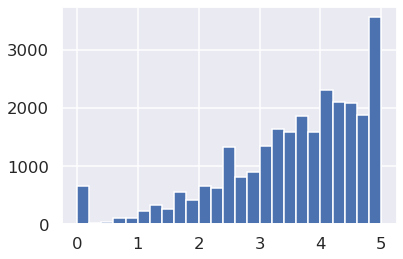

In [55]:
plt.hist(df_steam['AvgRating']*5, bins = 25) # Unweighted steam ratings distribution histogramyear

(array([1.625000e+03, 5.370000e+02, 8.250000e+02, 8.050000e+03,
        1.280200e+04, 1.455200e+04, 4.731800e+04, 4.878700e+04,
        7.320800e+04, 7.044400e+04, 1.524630e+05, 1.645770e+05,
        1.279400e+06, 5.369600e+05, 4.380050e+05, 7.209080e+05,
        9.598900e+05, 1.967427e+06, 1.572702e+06, 1.974187e+06,
        2.684326e+06, 6.714170e+06, 4.358539e+06, 5.788099e+06,
        3.213881e+06]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 25 Patch objects>)

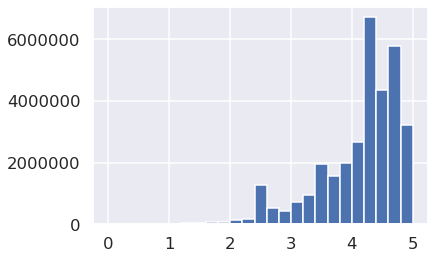

In [56]:
plt.hist(df_steam['AvgRating']*5, weights = df_steam['NumRating'], bins = 25) # Weighted steam ratings distribution histogram

(array([4.600e+01, 0.000e+00, 3.000e+00, 5.000e+00, 8.000e+00, 4.000e+00,
        3.600e+01, 1.500e+01, 4.000e+01, 3.000e+01, 4.400e+01, 8.400e+01,
        2.320e+02, 1.810e+02, 2.600e+02, 4.560e+02, 6.910e+02, 1.120e+03,
        1.936e+03, 2.694e+03, 3.647e+03, 4.332e+03, 3.251e+03, 1.632e+03,
        1.761e+03]),
 array([1.  , 1.16, 1.32, 1.48, 1.64, 1.8 , 1.96, 2.12, 2.28, 2.44, 2.6 ,
        2.76, 2.92, 3.08, 3.24, 3.4 , 3.56, 3.72, 3.88, 4.04, 4.2 , 4.36,
        4.52, 4.68, 4.84, 5.  ]),
 <a list of 25 Patch objects>)

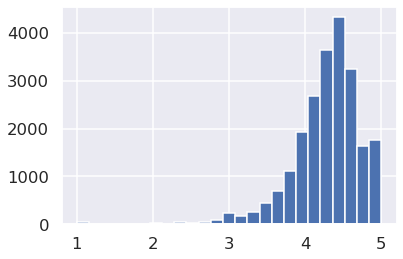

In [57]:
plt.hist(df_googleplay['Rating'], bins = 25) # Unweighted googleplay ratings distribution histogram

(array([6.00000000e+01, 0.00000000e+00, 3.90000000e+01, 1.71000000e+02,
        7.48000000e+02, 1.15700000e+03, 1.31900000e+03, 1.21400000e+03,
        7.95000000e+02, 1.37280000e+04, 3.35490000e+04, 7.74420000e+04,
        4.14120000e+04, 8.68120000e+04, 4.29777000e+05, 9.17688000e+05,
        2.88157700e+06, 1.56102290e+07, 3.41718130e+07, 1.11294063e+08,
        3.14314908e+08, 5.80888278e+08, 4.61236786e+08, 9.57058150e+07,
        4.70740800e+06]),
 array([1.  , 1.16, 1.32, 1.48, 1.64, 1.8 , 1.96, 2.12, 2.28, 2.44, 2.6 ,
        2.76, 2.92, 3.08, 3.24, 3.4 , 3.56, 3.72, 3.88, 4.04, 4.2 , 4.36,
        4.52, 4.68, 4.84, 5.  ]),
 <a list of 25 Patch objects>)

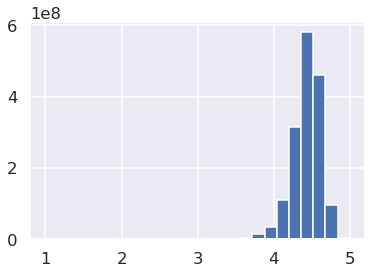

In [58]:
plt.hist(df_googleplay['Rating'], weights = df_googleplay['NumRating'], bins = 25) # Weighted googleplay ratings distribution histogram

In [59]:
# For plotting the regression line
# Let's fit an exponential function.  
# This looks like a line on a lof-log plot.
def myExpFunc(x, a, b):
    return a * np.power(x, b)

In [60]:
# For plotting a more complicated regression line
def myComplexFunc(x, a, b, c):
    return a * np.power(x, b) + c

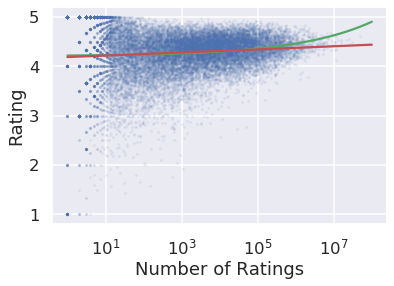

In [61]:
# googleplay Rating * Num of ratings Scatterplot (in log scale)
plt.scatter(df_googleplay['NumRating'], df_googleplay['Rating'], alpha=0.06,s=3)
plt.xscale('log')
a1, b1 = np.polyfit(df_googleplay['NumRating'], df_googleplay['Rating'], 1)
plt.xlabel("Number of Ratings")
plt.ylabel("Rating")

newX = np.logspace(0, 8, base=10)
popt, pcov = curve_fit(myComplexFunc, df_googleplay['NumRating'], df_googleplay['Rating'])
plt.plot(newX, myComplexFunc(newX, *popt), 'g-', 
         label="({0:.3f}*x**{1:.3f}) + {2:.3f}".format(*popt))
popt, pcov = curve_fit(myExpFunc, df_googleplay['NumRating'], df_googleplay['Rating'])
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))


#x = np.linspace(10,10**7,100)
#y = a1 * x + b1
#plt.plot(x, y, 'r');  # dotted red

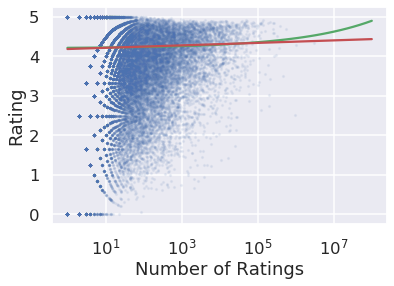

In [62]:
# steam Rating * Num of ratings Scatterplot (in log scale)
plt.scatter(df_steam['NumRating'], df_steam['AvgRating']*5, alpha=0.08,s=3)
plt.xscale('log')
plt.xlabel("Number of Ratings")
plt.ylabel("Rating")

newX = np.logspace(0, 8, base=10)
popt, pcov = curve_fit(myComplexFunc, df_googleplay['NumRating'], df_googleplay['Rating'])
plt.plot(newX, myComplexFunc(newX, *popt), 'g-', 
         label="({0:.3f}*x**{1:.3f}) + {2:.3f}".format(*popt))
popt, pcov = curve_fit(myExpFunc, df_googleplay['NumRating'], df_googleplay['Rating'])
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))

### Analysis of above log graphs
Because the line on both graphs is flat, there is no real distinct correlation between the number of ratings and the average rating given to a game. 

What this means for us:
We do not have to weigh the different ratings based on the number of ratings. There isn't any reason to suspect that because a game has more reviews, it would get more positive reviews so we can give every rating the same weight.

In [63]:
# Extract the similar categories between the two
steam_similar = [steam_act_avg, steam_adv_avg, steam_cas_avg, steam_rac_avg, steam_sim_avg, steam_spt_avg, steam_stg_avg]
google_similar = [google_act_avg, google_adv_avg, google_cas_avg, google_rac_avg, google_sim_avg, google_spt_avg, google_stg_avg]

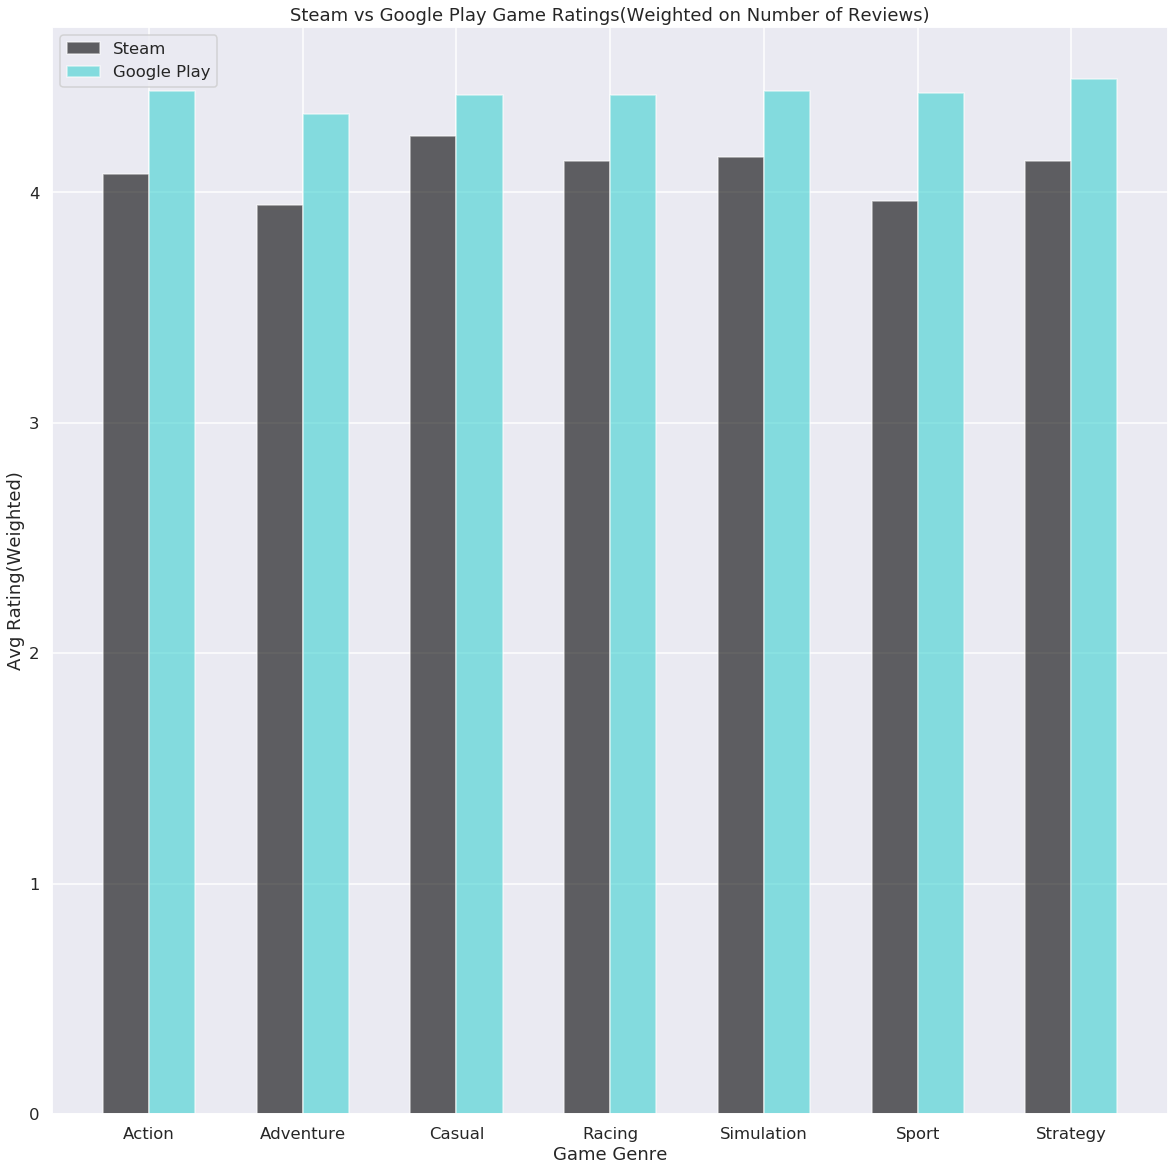

In [64]:
# Plot similar categories
n = 7  # 7 similar categories
fig, ax = plt.subplots(figsize=(20, 20))
index = np.arange(n)
bar_width = .3
opacity = .6
ax.bar(index, steam_similar, bar_width, alpha=opacity, color='black', label='Steam')
ax.bar(index + bar_width, google_similar, bar_width, alpha=opacity, color='#3fd2d1', label = 'Google Play')
ax.set_xlabel('Game Genre')
ax.set_ylabel('Avg Rating(Weighted)')
ax.set_title('Steam vs Google Play Game Ratings(Weighted on Number of Reviews)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Action', 'Adventure', 'Casual', 'Racing', 'Simulation', 'Sport', 'Strategy'))
ax.legend()
plt.show()

### Analysis of above graph
With the two graphs, we can see two different things.
From the comparison between steam and mobile games, we see a fairly consistent trend across the board with mobile games always being a decent bit above steam games. The biggest issue with this, however, is that if you actually compare across the categories for google play, we can see that it typically averages out at around 4.5 We believe the biggest reason for this is that typically mobile games have a much smaller emphasis on reviews.

The games we see on a mobile platform seem to always sit at around 4.5 which means across the board, user reviews have very similar distributions overall. This could be due to a number of reasons. There could potentially be bots across the reviews where all the different users give 5 stars with reviews that look the same. Another reason could be because mobile games in similar categories are often developed for similar purposes, for the user to pull out their phone and play for a few minutes at a time. The games overall are a lot more casual and typically will be a lot less story driven, while instead focusing on more arcade style like games where it's meantt to just be there for quick entertainment.

On the other hand, we can actually see a decent bit of variety across Steam games. We see adventure and sport games scored under 4/5 while the other ones all sit comfortably above it. These trends let us see that typically casual games released for pc will do a decent bit better than other ones. A potential reason the sports category could be so low might be because the biggest sports series(NBA, NHL) games have historically been rehashes of old versions. The games don't differ too much from year to year which might be a reason for the lower reviews. For adventure games, we are not too sure why it's so much lower than other categories, but a potential reason might be that maybe users aren't looking for a game focused towards just exploring, but instead are looking for more competitive type games like shooters.

In [65]:
t_val, p_val = stats.ttest_ind(steam_similar, google_similar)
print(p_val)

7.066394803521256e-06


### Analysis of the stats value
Becuse we can see our p value is extremely small(< 0.05), we know that there is a difference between the ratings for steam and google play

While this seems somewhat important, we can see this difference in the average rating for google play and steam. Google play ratings are always above the steam ones and sit at the same level so while this data is shown to be statistically significant, we have no real conclusion we can draw from it other than we are confident that google play reviews are on average higher than steam reviews.

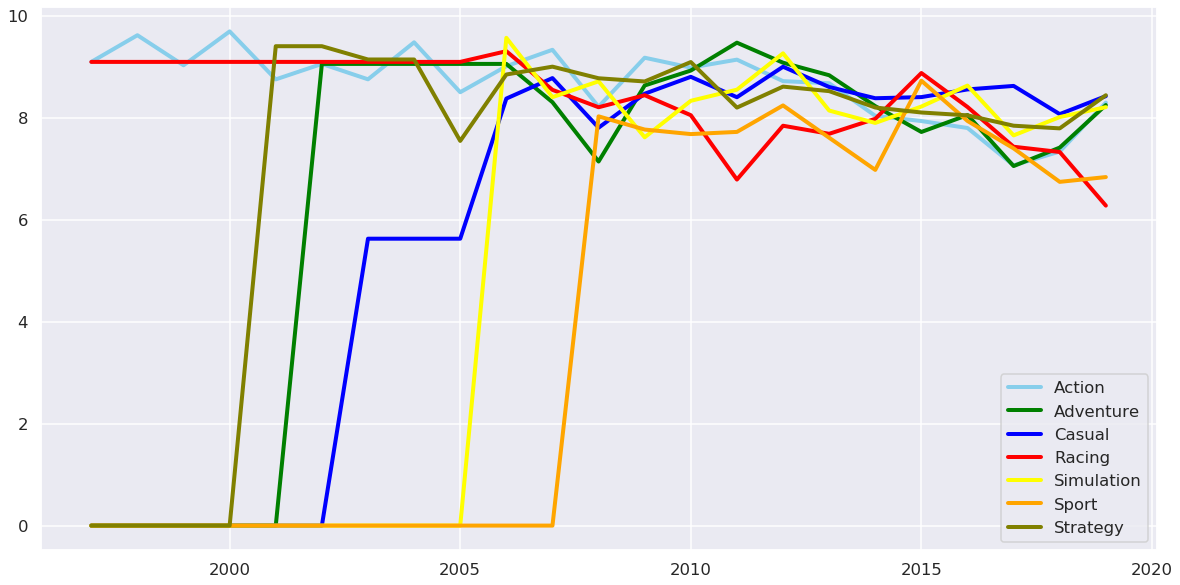

In [66]:
# Plotted with if no notables games came out in a year, rating stays the same
fig, ax = plt.subplots(figsize=(20, 10))

df_steam_time = pd.DataFrame({'x': range(df_steam['Year'].min(), df_steam['Year'].max() + 1), 
                                      'Action': steam_act_year, 
                                      'Adventure': steam_adv_year, 
                                      'Casual': steam_cas_year,
                                      'Racing': steam_rac_year,
                                      'Simulation': steam_sim_year,
                                      'Sport': steam_spt_year,
                                      'Strategy': steam_stg_year})

plt.plot('x', 'Action', data=df_steam_time, marker='', color='skyblue', linewidth=4)
plt.plot('x', 'Adventure', data=df_steam_time, marker='', color='green', linewidth=4)
plt.plot('x', 'Casual', data=df_steam_time, marker='', color='blue', linewidth=4)
plt.plot('x', 'Racing', data=df_steam_time, marker='', color='red', linewidth=4)
plt.plot('x', 'Simulation', data=df_steam_time, marker='', color='yellow', linewidth=4)
plt.plot('x', 'Sport', data=df_steam_time, marker='', color='orange', linewidth=4)
plt.plot('x', 'Strategy', data=df_steam_time, marker='', color='olive', linewidth=4)
plt.legend()

# https://python-graph-gallery.com/122-multiple-lines-chart/

### Analysis of above graph
From the above graph, the biggest thing we see is a similar correlation between all games generall going down. For this graph, we made it so that if a particular year had no reviews for a game, we would keep the line flat.

What's interesting about the above graph though is that we can see that while there is a general trend down, 2015 had the games rating spike up again and 2019 seems to be generally going up again for most game categories(besides racing and sports). I think the most interesting thing about the above graph is still the fact that these games are all generally going down so it could perhaps show that users are more critical of the game they are given. Perhaps the standard for games has gone up on average so typical game ratings has gone down.

# Ethics & Privacy

The two main datasets we used in this project came from Kaggle. The datasets are intended to be public and free. All of the data is publicly visible on the Steam store site and Google play store. The datasets consist of average and median playtime and review ratings from players, but they are recorded in numeral form and thus eliminated any concerns for personal privacy.

The datasets consist of over 27,000 games on Steam and over 244,000 apps on Google play store without sampling for a smaller size of data, avoiding the possibility of sampling error and any statistical bias that comes with it.
In this project, we used these datasets purely for the purpose of answering an academic question - finding a pattern of the most popular games by categories over two platforms, and how it changes over time. We believe that our result won’t be misused by any personnel to take any harmful actions against the game publishers, the players, Valve and Google which own the two store sites which we collected our data from, Nik Davis and Gautham Prakash, the publishers of these datasets.

# Conclusion & Discussion

As we compared the two different platforms for gaming, we see a general difference in how people actual rate games on mobile vs steam. It seems mobile game reviews are generally consistently similar across the board. One of our main goals which was to see differences across popular games on the different platforms definitely did not produce results expected because of the lack of different ratings for google play. The steam reviews seem to give decent results, but we had nothing strong to compare it to so we can't particularly draw any conclusions on what genres are more popular on which platforms.

Our biggest limitation for comparing the two comes from the google play games. For google play, the actual games only had one category each which could have potentially contributed to data that is not particularly good to analyze. And as we can see, the actual ratings across the board all sit around the same level which makes it hard to actually draw any clear conclusion from it.

For our other main goal of comparing steam categories across the years, we actually got somewhat decent results. Overall it was fairly surprising to see a general decrease in the reviews. This graph gave us a decent visualization on the general trends for ratings and you can see some fairly interesting trends such as how racing was generally going down until it spiked back up in 2015 and then started going down again.

Our biggest limitation for this is most likely the lack of actual information on review dates. All of our analysis is based on release year which does not actually accurately depict how the games are doing right now, just how they affect the release year. For example, a game like CSGO was released years back but is still a relevant game today and as the games update over time, the reviews could also be shifting. So for us to limit this data to only the release year makes it so that some of the conclusions we can draw from this data is not completely accurate to current trends.